In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df = pd.read_csv('/Users/fytian/Desktop/fintech_socie/NVDA copy.csv') 
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,124.910004,126.589996,122.139999,122.279999,122.205246,54734300
1,2022-09-27,125.070000,127.360001,122.580002,124.129997,124.054108,55385400
2,2022-09-28,124.099998,128.229996,123.540001,127.360001,127.282150,54241400
3,2022-09-29,124.480003,125.000000,119.459999,122.199997,122.125298,53276300
4,2022-09-30,120.870003,126.330002,120.750000,121.389999,121.315796,56563800
...,...,...,...,...,...,...,...
264,2023-10-13,469.600006,471.160004,452.799988,454.609985,454.609985,47411500
265,2023-10-16,450.630005,462.250000,449.119995,460.950012,460.950012,37509900
266,2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300
267,2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400


Using this data in our LSTM model we will predict the open prices for next 20 days.

In [78]:
split_percentage = 0.8
split = int(split_percentage*len(df)) 
train = df[:split]
test= df[split:]
test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
264,2023-10-13,469.600006,471.160004,452.799988,454.609985,454.609985,47411500
265,2023-10-16,450.630005,462.250000,449.119995,460.950012,460.950012,37509900
266,2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300
267,2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400
268,2023-10-19,428.109985,432.970001,418.820007,421.010010,421.010010,50123300


In [79]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,124.910004,126.589996,122.139999,122.279999,122.205246,54734300
1,2022-09-27,125.070000,127.360001,122.580002,124.129997,124.054108,55385400
2,2022-09-28,124.099998,128.229996,123.540001,127.360001,127.282150,54241400
3,2022-09-29,124.480003,125.000000,119.459999,122.199997,122.125298,53276300
4,2022-09-30,120.870003,126.330002,120.750000,121.389999,121.315796,56563800
...,...,...,...,...,...,...,...
210,2023-07-28,466.679993,470.269989,463.809998,467.500000,467.461487,33119400
211,2023-07-31,467.540009,471.299988,465.059998,467.290009,467.251526,25105500
212,2023-08-01,464.600006,469.000000,460.269989,465.070007,465.031708,23785800
213,2023-08-02,458.309998,458.399994,433.869995,442.690002,442.653534,53014200


In [80]:
#taking adj_close price from data in 2d array , if we will do train.loc[:, 'adj_close'].values it gives one d array which wont
#be considered in scaling
train_close=train.iloc[:, 5:6].values

In [81]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_close_scaled= ss.fit_transform(train_close)

Below i will be taking previous 60 days open datasteps to predict the next values so i am converting the data as per  input in LTSM layers. i.e for taking 0 to 59 days close price to get 60th day price as output, 1 to 60 for 61, 2 to 61 for 62

In [82]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_close_scaled)):
    xtrain.append(train_close_scaled[i-60:i,0])
    ytrain.append(train_close_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
ytrain

array([0.13397161, 0.14543705, 0.11341092, 0.10974527, 0.07984137,
       0.07749862, 0.09312588, 0.09342903, 0.08518818, 0.09714983,
       0.08381018, 0.10018153, 0.12137613, 0.12912081, 0.13165641,
       0.14571269, 0.15640648, 0.17853815, 0.16958071, 0.15271319,
       0.18231397, 0.21963184, 0.22161628, 0.22321486, 0.23641666,
       0.25193365, 0.21877752, 0.22911296, 0.26786407, 0.28897591,
       0.27219114, 0.27188798, 0.30176433, 0.30264633, 0.30628433,
       0.27673874, 0.29115329, 0.32375822, 0.31805301, 0.29705143,
       0.28012883, 0.25992641, 0.26265499, 0.34285815, 0.33244   ,
       0.33836565, 0.33051076, 0.31623399, 0.33321173, 0.349087  ,
       0.33982641, 0.33260416, 0.35722048, 0.3366839 , 0.32370033,
       0.32372793, 0.35396771, 0.35851608, 0.39471012, 0.3997823 ,
       0.40460631, 0.4128485 , 0.42026377, 0.44019387, 0.42883672,
       0.42200034, 0.41866494, 0.43448774, 0.44548654, 0.45634742,
       0.46152987, 0.44741612, 0.43164843, 0.43594867, 0.45088

In [83]:
#Reshaping the train data to make it as input for LTSM layer
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [84]:
xtrain.shape

(155, 60, 1)

Building LSTM Network

In [85]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [86]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 43ms/step - loss: 0.1897
Epoch 2/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0453
Epoch 3/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0371
Epoch 4/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0169
Epoch 5/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0155
Epoch 6/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0161
Epoch 7/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0119
Epoch 8/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0100
Epoch 9/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0109
Epoch 10/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0102
Epoch 11/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0083
Epoch 12/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0099
Epoch 13/100
6/6 [==============================]

Predicting for test data
As I have 60 input in THE layer, i will concatenate on the train and test and will take last 60 values of the training set with test set

In [89]:
test_close= test.iloc[:, 5:6].values #taking  open price
total= pd.concat([train['Adj Close'],test['Adj Close']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [127]:

xtest= []
for i in range(60,115):
    xtest.append(test_input[i-60:i,0])#creating input for lstm prediction
len(test_close)

54

In [128]:
xtest= np.array(xtest)
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

2/2 [==============================] - 0s 10ms/step


In [129]:
predicted_value= ss.inverse_transform(predicted_value)

In [130]:
predicted_value

array([[475.59372],
       [475.13058],
       [474.28964],
       [473.14972],
       [471.6151 ],
       [469.6125 ],
       [467.01538],
       [464.0446 ],
       [461.00787],
       [458.16934],
       [455.7149 ],
       [453.7609 ],
       [452.6787 ],
       [452.6091 ],
       [453.71082],
       [455.9753 ],
       [459.15793],
       [462.9763 ],
       [467.31674],
       [472.0784 ],
       [477.1237 ],
       [482.19214],
       [487.01035],
       [491.2164 ],
       [494.46387],
       [496.488  ],
       [497.15677],
       [496.4772 ],
       [494.63754],
       [491.91946],
       [488.49908],
       [484.56918],
       [480.3058 ],
       [475.78918],
       [471.01056],
       [466.074  ],
       [461.18475],
       [456.54117],
       [452.38184],
       [448.95258],
       [446.46057],
       [445.12305],
       [444.9285 ],
       [445.7838 ],
       [447.56912],
       [450.20264],
       [453.50894],
       [457.2979 ],
       [461.44608],
       [465.82178],


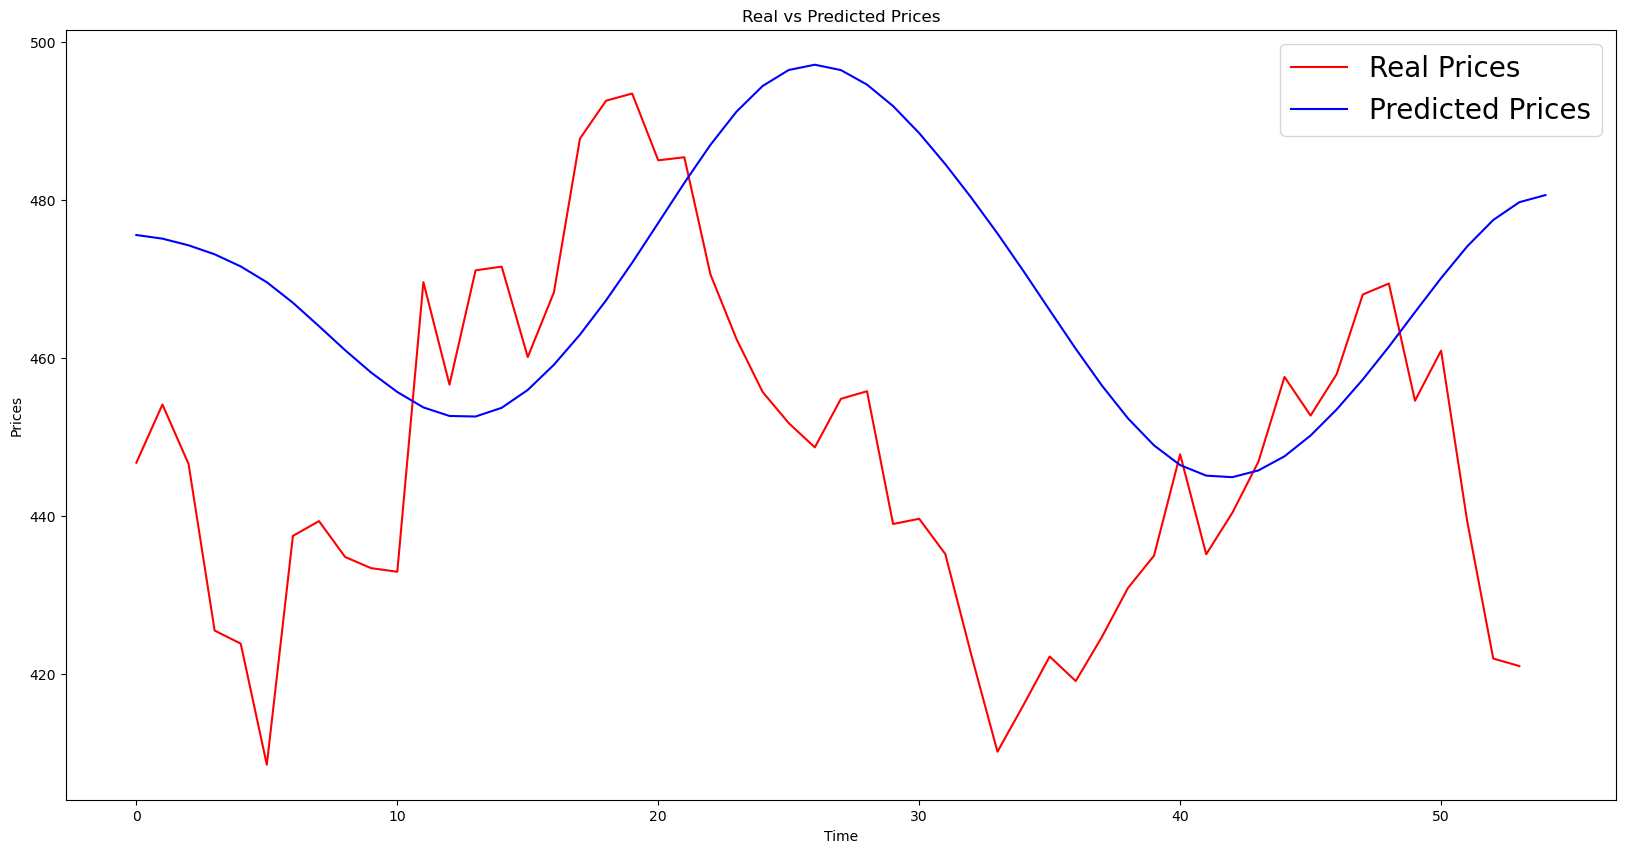

In [131]:
plt.figure(figsize=(20,10))
plt.plot(test_close,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [133]:
len(test)

54

In [134]:
len(predicted_value)

55